# 1. Reading, Understanding & Cleaning Data


In [598]:
# Suppressing warnings

import warnings
warnings.filterwarnings('ignore')

In [599]:
# Importing libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [600]:
# Data display customization

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

##  1.1  Import Data 

In [601]:
# Read the data from csv file

lead = pd.read_csv('leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspect the dataframe


In [602]:
# Checking the shape of dataframe

lead.shape

(9240, 37)

In [603]:
# Describing the columns of dataframe

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [604]:
# Get the info about columns

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 1.3 Cleaning the dataframe

In [605]:
# As we can see, lots of variables are filled with SELECTs & they are as good as NULLs. Therefore, converting them to NULLs

lead = lead.replace('Select', np.nan)

In [606]:
# Missing data values

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [607]:
# Missing data, percentage-wise

round(100.0*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [608]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Converting binary variables(Yes/No) to 0/1

In [609]:
# Enlisting columns with yes/no levels

num_vars = ['Do Not Email', 'Do Not Call','Search', 'Magazine','Newspaper Article','X Education Forums', 'Newspaper',
                 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Creating a map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to num_vars list

lead[num_vars] = lead[num_vars].apply(binary_map)

In [610]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


## 1.4 Dropping the unwanted columns


In [611]:
# Dropping columns with more than 60% null values

lead = lead.drop(lead.iloc[:, list(round(100*(lead.isnull().sum()/len(lead.index)),2)>60)].columns, axis=1)
lead.shape


(9240, 35)

In [612]:
# Dropping columns: Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score with
# 45.65% of missing data (since there are too variations in these columns)

lead = lead.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], 1)


In [613]:
lead.shape

(9240, 31)

##### Checking Column Lead Quality


In [614]:
# Lead Quality - indicates the Quality of the lead

lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

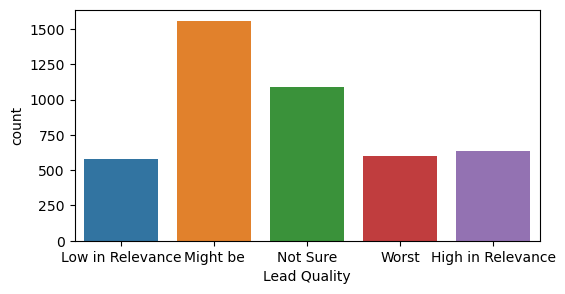

In [615]:
plt.figure(figsize=(6,3))
sns.countplot(lead['Lead Quality'])
plt.show()

In [616]:
# checkin NaN values.

print(lead['Lead Quality'].isna().sum())
print(lead['Lead Quality'].isna().sum()/len(lead.index))

4767
0.5159090909090909


In [617]:
# Replacing Nan values with 'Not Sure', Since Nan represents non-surity

lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')
print(lead['Lead Quality'].isna().sum())
print(lead['Lead Quality'].isna().sum()/len(lead.index))

0
0.0


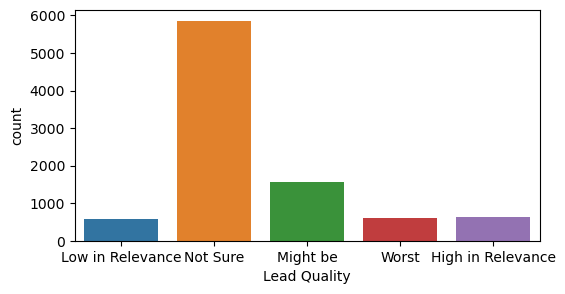

In [618]:
plt.figure(figsize=(6,3))
sns.countplot(lead['Lead Quality'])
plt.show()

##### Checking Column City

In [619]:
lead.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [620]:
print(lead.City.isnull().sum())
print(lead.City.isnull().sum()/len(lead.index))

3669
0.3970779220779221


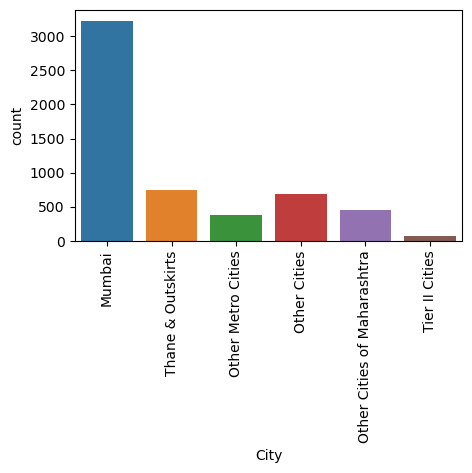

In [621]:
plt.figure(figsize= (5,3))
sns.countplot(lead.City)
plt.xticks(rotation=90)
plt.show()

In [622]:
# Imputing missing values with mode
lead.City = lead.City.replace(np.nan, lead.City.mode()[0])

##### Checking 'Specialization Column'

In [623]:
lead.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [624]:
print(lead.Specialization.isnull().sum())
print(lead.Specialization.isnull().sum()/len(lead.index))

3380
0.3658008658008658


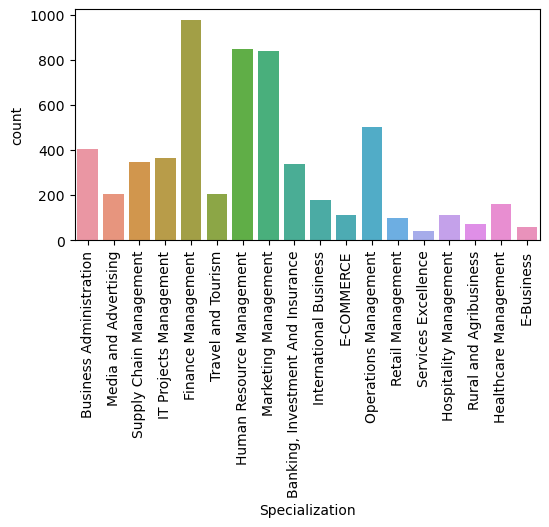

In [625]:
# Visualizing Specialization column

plt.figure(figsize=(6,3))
sns.countplot(lead.Specialization)
plt.xticks(rotation=90)
plt.show()

In [626]:
'''Here, it may so happended that the quality lead has not chosen any option if his specialization was not mentioned. Therefore, it is wise
to replace Nan values with 'Others' '''

lead.Specialization= lead.Specialization.replace(np.nan, 'Others')

##### Checking 'Tags Column'

In [627]:
lead.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [628]:
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [629]:
print(lead.Tags.isnull().sum())
print(lead.Tags.isnull().sum()/len(lead.index))

3353
0.36287878787878786


In [630]:
# Imputing missing values with its mode
lead.Tags = lead.Tags.replace(np.nan, lead.Tags.mode()[0])

##### Checking Country Column

In [631]:
lead.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [632]:
# replacing missing values with mode

lead.Country = lead.Country.replace(np.nan, lead.Country.mode()[0])

##### Checking 'What matters most to you in choosing a course' Column

In [633]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [634]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

##### Checking 'What is your current occupation' Column 

In [635]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [636]:
# Imputing missing values with mode

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed ')

In [637]:
round(100.0*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [638]:
# small percentages of missing values can be easily dropped

lead.dropna(inplace=True)

In [639]:
lead.shape

(9074, 31)

 # 2. Exploratory Data Analysis
 

### Univariate Analysis

#### Converted Column


In [640]:
# Converted is our target variable, tells lead converted(1) or not(0)

lead.Converted.value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

##### Analysis on Lead Source & Lead Origin

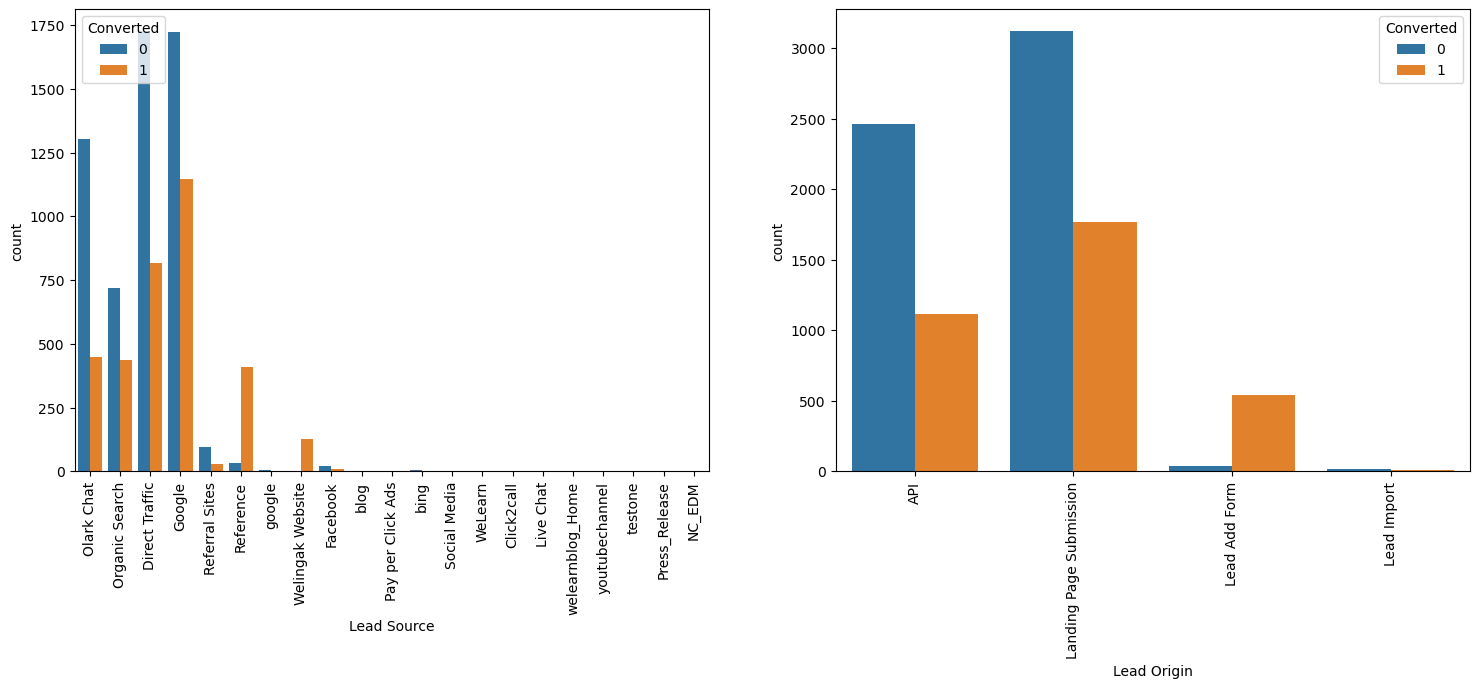

In [641]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(lead['Lead Source'], hue= lead['Converted'])
plt.xticks(rotation= 90)
print()
plt.subplot(1,2,2)
sns.countplot(data= lead, x= 'Lead Origin', hue= 'Converted')
plt.xticks(rotation=90)
plt.show()

In [642]:
#Observations

#API and landing page submission has conversion rate of about 40-45% and lead counts are also considerably high.
#lead counts from lead add form is very low but conversion rate is very high
#lead import has both, lead count and conversion rate very low
#lead source column has numerous levels, most of which are contributing minutely hence placing them under common name 'others' for better encoding

##### Looking towards Lead Source column, we should focus more on increasing conversion rate for both API and landing page submission and increasing lead counts for Lead add form

In [643]:
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_lead_source')

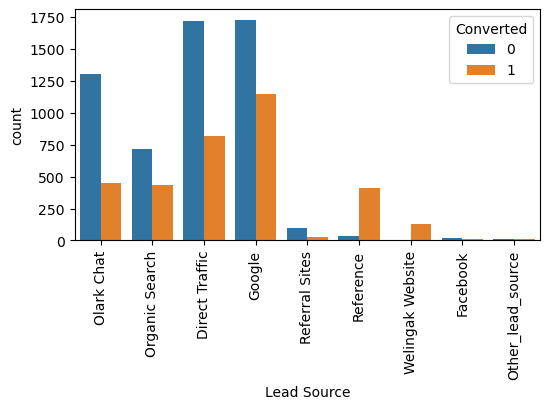

In [644]:
# Visualizing lead source again

plt.figure(figsize= (6,3))
sns.countplot(lead['Lead Source'], hue= lead['Converted'])
plt.xticks(rotation= 90)
plt.show()

##### Observations:

Google and direct traffic generate the most leads.

The conversion rate of reference leads and leads generated by the Welingak  website is very high.

To increase overall lead conversion rate, focus on improving lead conversion of
Olark chat, Organic Search, Direct Traffic, and Google, as well as generating more  leads from Referral Sites and Welingak Website.

##### Analysis of 'Total Visits and Total time spent on website' Column

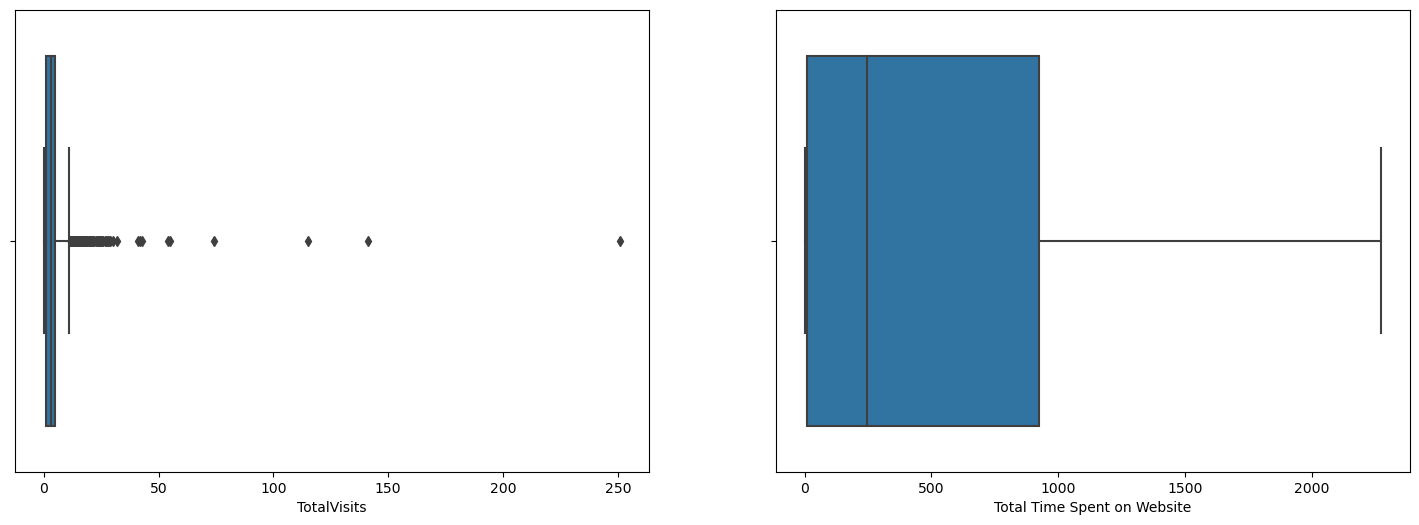

In [645]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(lead['TotalVisits'])
print()
plt.subplot(1,2,2)
sns.boxplot(lead['Total Time Spent on Website'])
plt.show()

In [646]:
lead.TotalVisits.describe(percentiles=[ .25, .50, .75, .95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [647]:
# No ouliers in 'Total Time Spent on Website'
# There are lot of outliers in TotalVisits, as can be evident from boxplot and describe. Hence capping them to 95% values

q1 = lead['TotalVisits'].quantile(0.95)
lead['TotalVisits'][lead['TotalVisits'] >= q1] =q1

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

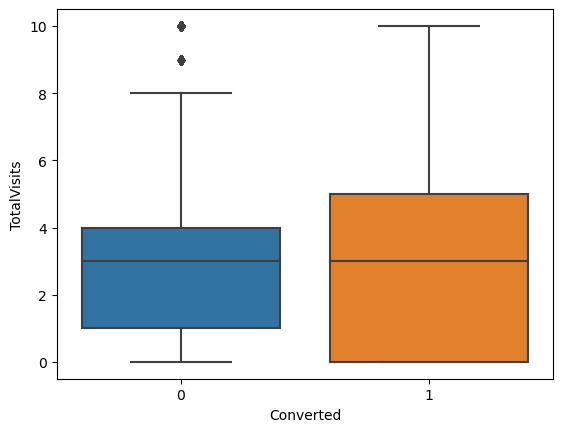

In [648]:
sns.boxplot(y= lead['TotalVisits'], x= lead['Converted'])

In [649]:
# Median for converted and non-converted leads are same and therefore 'TotalVisits' are of no importance for further analysis.

In [650]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

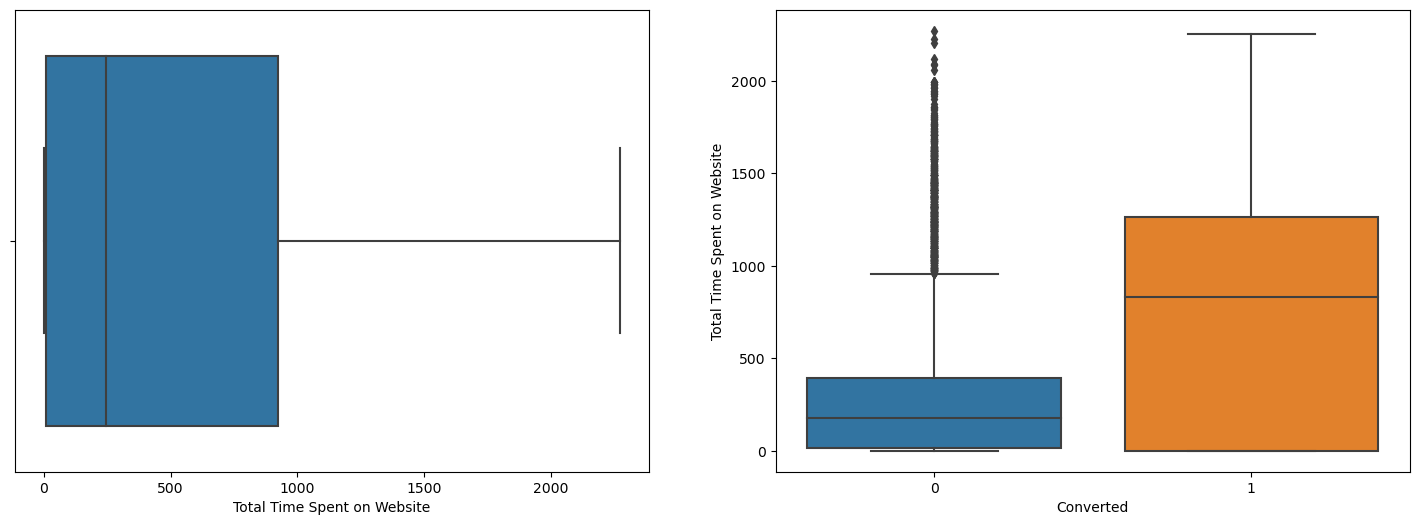

In [651]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(lead['Total Time Spent on Website'])
plt.subplot(1,2,2)
sns.boxplot( data = lead, y = 'Total Time Spent on Website', x = 'Converted')
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

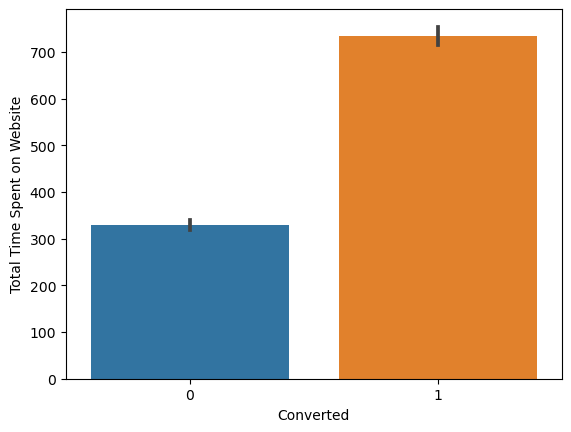

In [652]:
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)

In [653]:
# Observation:
#  Leads who spend more time on the site are more likely to convert.
#  To encourage leads to spend more time on the website, it should be made more engaging.

##### Hence, websites should be made more engaging so as to make users spent more time and hence get converted

##### Analysis on 'Do Not Email and Do Not Call' Column

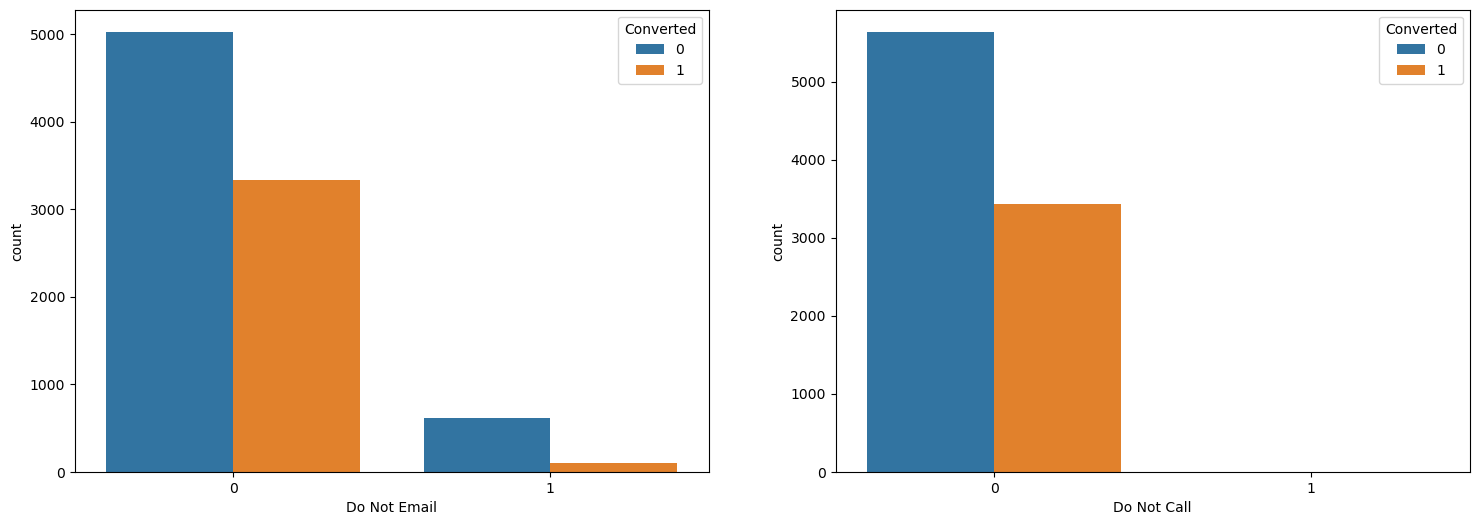

In [654]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(data = lead, x= 'Do Not Email', hue= 'Converted')
plt.subplot(1,2,2)
sns.countplot(data = lead, x= 'Do Not Call', hue= 'Converted')
plt.show()

##### Analysis of 'Last Activity' Column

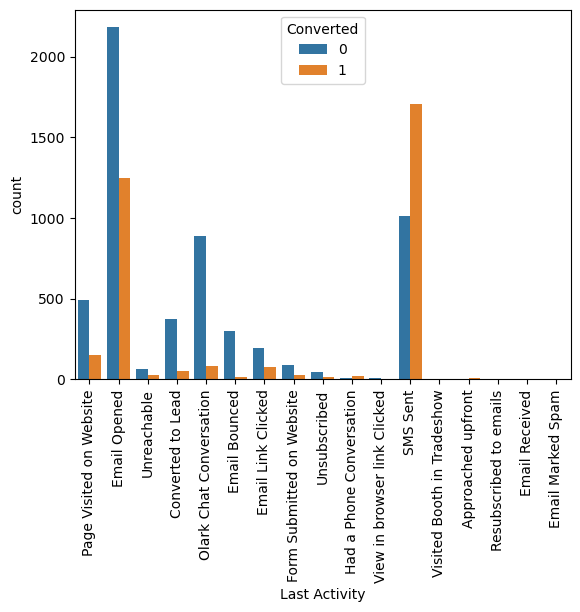

In [655]:
sns.countplot(data = lead, x= 'Last Activity', hue= 'Converted')
plt.xticks(rotation=90)
plt.show()

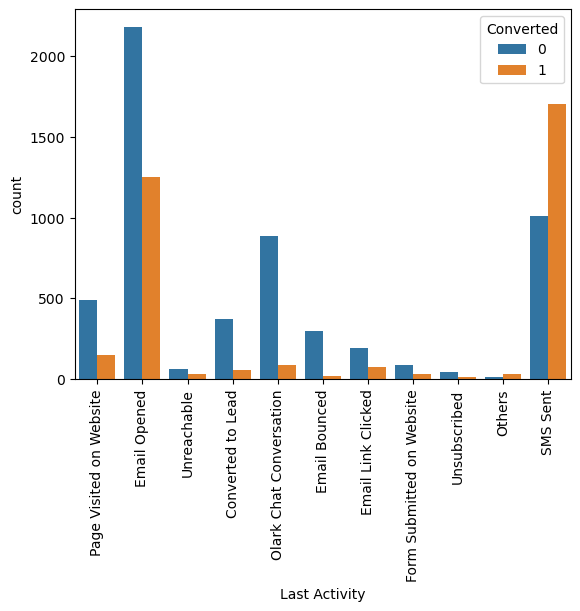

In [656]:
# Converting not so important levels to "others" category
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Approached upfront',
                        'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

# Again Visualising Last Activity column
sns.countplot(data = lead, x= 'Last Activity', hue= 'Converted')
plt.xticks(rotation=90)
plt.show()

While the counts of Email Opened is already high, conversion rate of sms sent is very good(~60%)

##### Analysis on 'Page views per visit' column

In [657]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

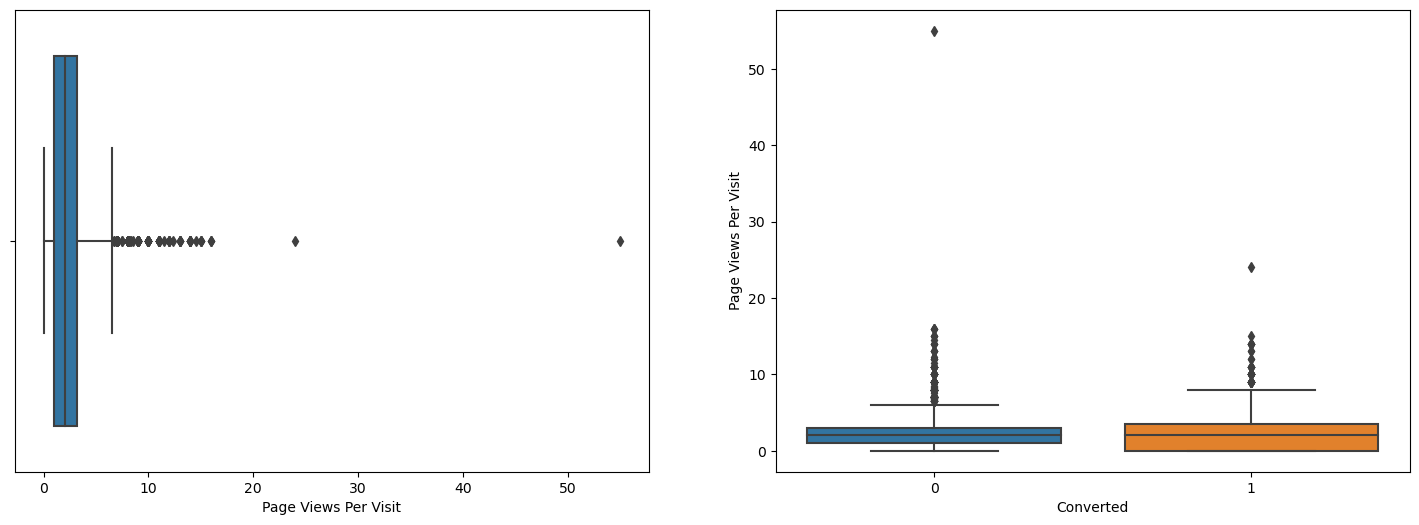

In [658]:
# plotting boxplot for ouliers search

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(y= lead['Page Views Per Visit'], x= lead['Converted'])
plt.show()

In [659]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis

q1 = lead['Page Views Per Visit'].quantile([0.05, 0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= q1[0]] =q1[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= q1[1]] =q1[1]

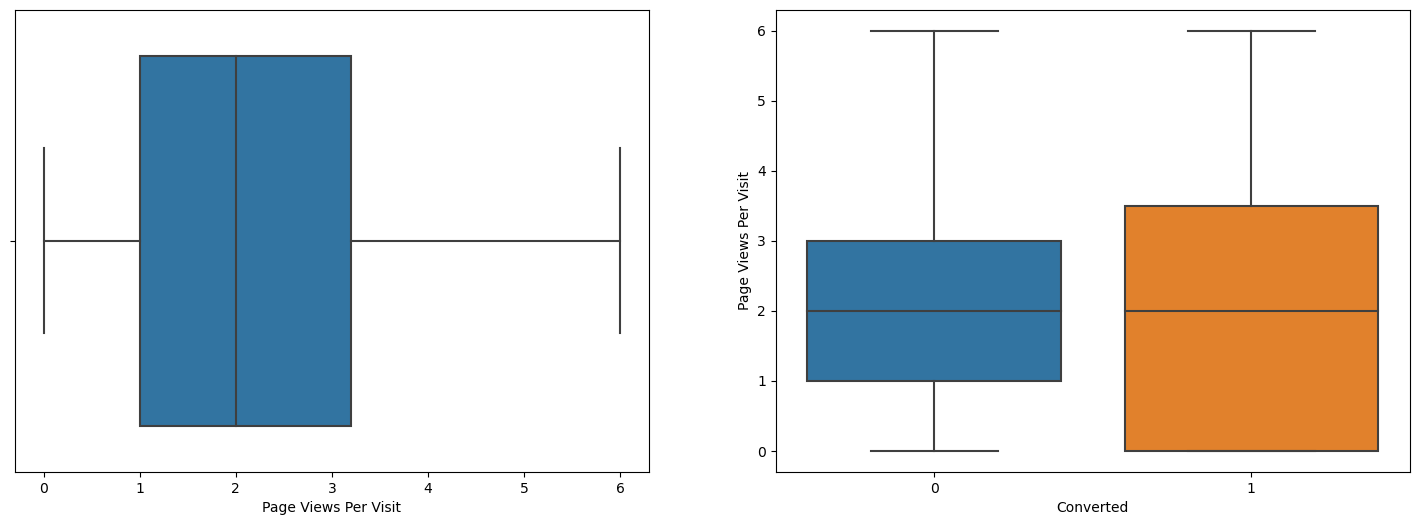

In [660]:
# plotting boxplot again to check whether outliers are capped

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(y= lead['Page Views Per Visit'], x= lead['Converted'])
plt.show()

Median seems equal for converted and non converted, hence nothing conclusive can be said for Page Views Per Visit

##### Analysis on 'Specialization & What is your current occupation' Column

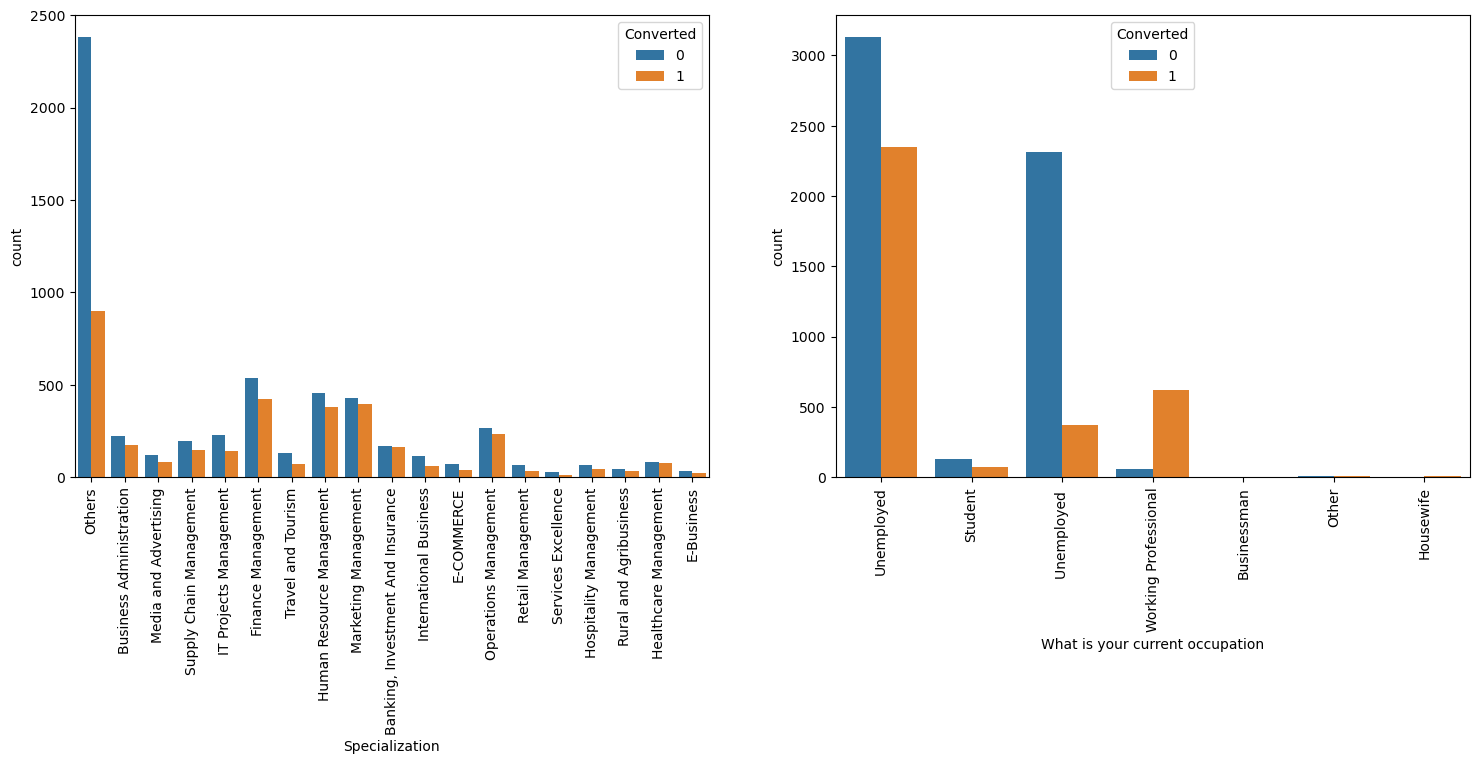

In [661]:
plt.figure(figsize= (18,6))
plt.subplot(1,2,1)
sns.countplot(lead['Specialization'], hue= lead['Converted'])
plt.xticks(rotation= 90)
plt.subplot(1,2,2)
sns.countplot(lead['What is your current occupation'], hue= lead['Converted'])
plt.xticks(rotation=90)
plt.show()

In [662]:
# In case of Specialization, each category is doing decent and hence no particular inference can be drawn
# In case of Occupation, Unemployed users top in no. of leads. Also, more focus shold be on working professional as their past conversion
# rate is very high amongst all

##### Focus should be on improving conversion rate of Umemployed users and targeting more working professionals

##### Analysis on 'Tags & Lead Quality' column

In [663]:
lead.Tags.describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

In [664]:
lead['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

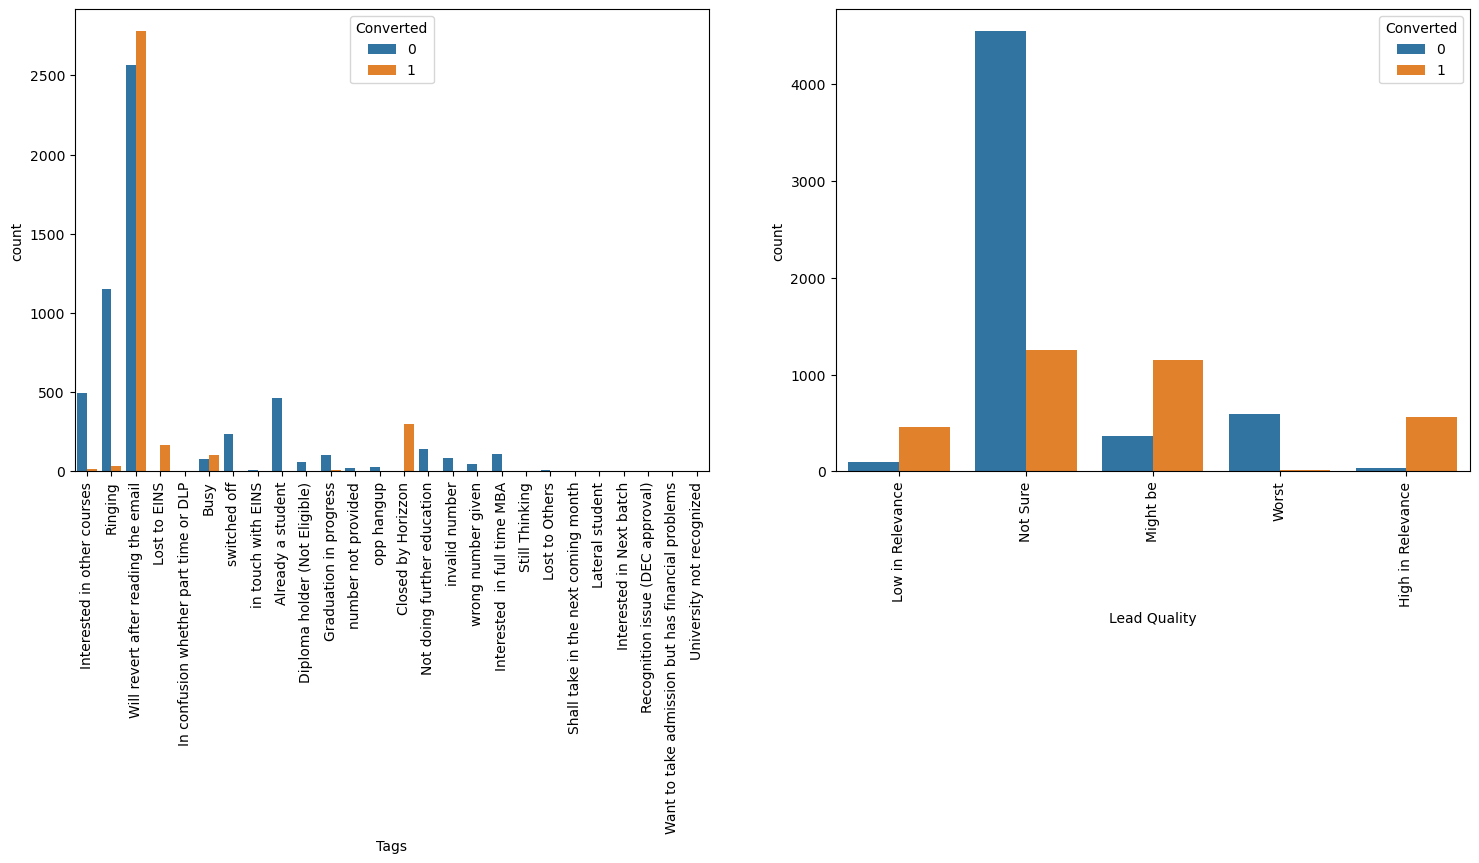

In [665]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x = "Tags", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [666]:
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

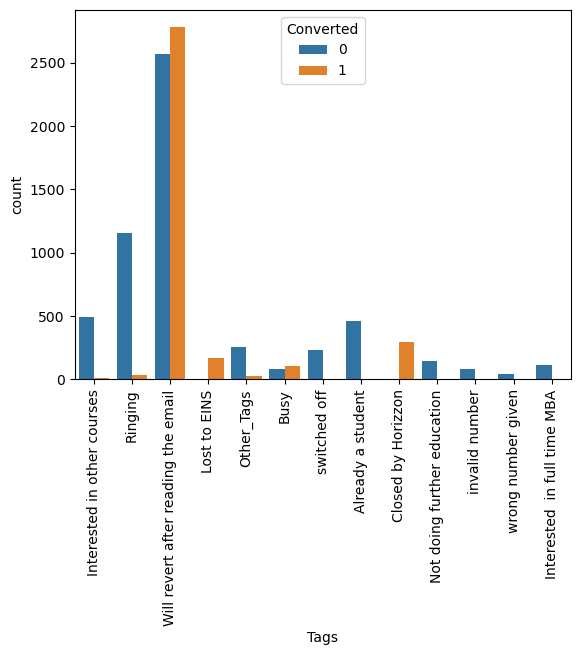

In [667]:
sns.countplot(x = "Tags", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [668]:
# will revert after reading the email and closed by horizon are two levels with high conversion rate in Tags column

##### Analysis on 'City & Country' column

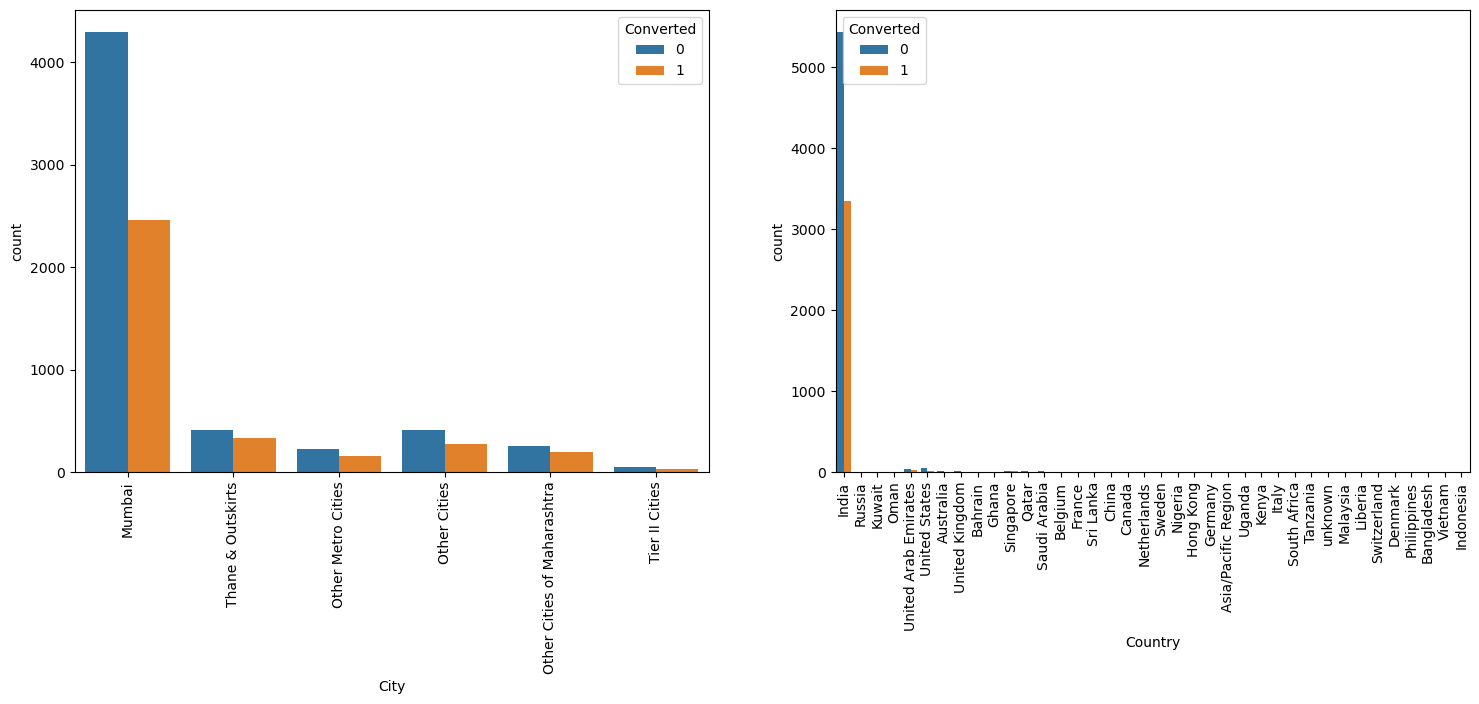

In [669]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x = "City", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = "Country", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [670]:
# Most of Our leads belong to Mumbai as City and India as Country with conversion rate above 50% in both cases

##### Analysis of 'Last Notable Activity' column

In [671]:
lead['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

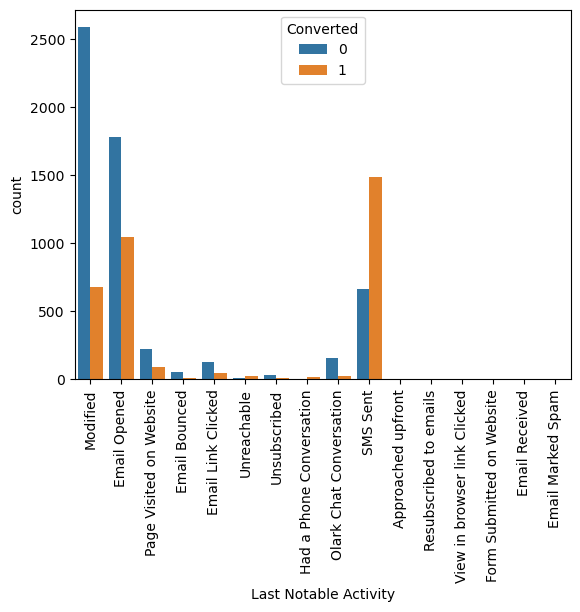

In [672]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

### SUMMARY
To improve the overall lead conversion rate, we should focus on increasing the conversion rate of 'API' and 'Landing page submission. whereas increasing the no. of leads of 'Lead add form'

Websites can be made more attractive so that visitors spend more time thus improving the conversion rate

Improving the conversion rate of 'Google', 'Olark chat', Organic search', 'Direct traffic' and increasing no. of leads of 'Wellingak' and 'Reference' - Will result in improving the overall conversion rate

Those having last activity as 'Email opened' should be phone called or got in touch ASAP and also by increasing the lead counts of sms sent, all of this will result in improving the overall conversion rate

To improve the overall lead conversion rate, we need to increase the count of working professionals leads by reaching them via social sites such as linkedin as evident from their past data. Also, try increasing the conversion rate of unemployed

We also observed that many columns contain data of binary values and basically inclined towards No. As these attributes do not contribute towards any inference, we can drop them.

In [673]:
# Looking at other columns which contain most NO(0) and hence add no value to the model

lead[['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations'
      , 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
         'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview' ]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [674]:
lead = lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                  'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                  'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call','Do Not Email'],1)


In [675]:
lead.shape

(9074, 14)

In [676]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# 3. Data Preparation

## 3.1 Creating dummy variables

In [677]:
# Creating dummy variables for categorical variables and dropping the first level.

dum = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dum.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [678]:
# concatinating the two dataframes
leads = pd.concat([lead, dum], axis=1)

In [679]:
# Dropping those original categorical variables whose dummies are created
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City',
           'Last Notable Activity'], axis = 1, inplace= True)
leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 3.2 Train-Test split

In [680]:
# Putting feature variables to X

X = leads.drop(['Converted','Prospect ID'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [681]:
# Putting target variable to y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [682]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)


## 3.3 Feature Scaling

In [683]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# making the feature variables learn the values such as mean and std dev and applying them on these variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [684]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [685]:
# Checking the original conversion rate

print('the conversion rate is ', (sum(lead['Converted'])/len(lead['Converted']))*100)

the conversion rate is  37.85541106458012


# 4.Model Building


## 4.1 Building Your First Training Model

In [686]:
import statsmodels.api as sm

# Logistic regression model (Genarilised linear model)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1018.7
Date:                Mon, 22 May 2023   Deviance:                       2037.4
Time:                        22:13:16   Pearson chi2:                 2.32e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6366
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.9411   2.16e+05   9.69e-05      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.2875      0.099      2.908      0.004       0.094       0.481
Total Time Spent on Website                              1.1590      0.071     16.436      0.000       1.021       1.297
Page Views Per Visit                                    -0.4089      0.110     -3.701      0.000      -0.625      -0.192
Lead Origin_Landing Page Submission                     -0.6613      0.243     -2.717      0.007      -1.138      -0.184
Lead Origin_Lead Add Form                               -1.9080      1.331     -1.433      0.152      -4.517       0.701
Lead Origin_Lead Import                                 26.4793   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.3467   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.3015      0.169      1.780      0.075      -0.030       0.634
Lead Source_Olark Chat                                   0.9435      0.265      3.564      0.000       0.425       1.462
Lead Source_Organic Search                               0.2840      0.229      1.238      0.216      -0.166       0.734
Lead Source_Other_lead_source                            1.3750      0.905      1.520      0.129      -0.399       3.149
Lead Source_Reference                                    2.9031      1.387      2.093      0.036       0.185       5.622
Lead Source_Referral Sites                               0.3452      0.543      0.635      0.525      -0.720       1.410
Lead Source_Welingak Website                             4.9695      1.522      3.265      0.001       1.986       7.953
Last Activity_Email Bounced                             -1.5300      0.790     -1.936      0.053      -3.079       0.019
Last Activity_Email Link Clicked                         1.1125      0.716      1.553      0.120      -0.292       2.517
Last Activity_Email Opened                               0.3365      0.426      0.791      0.429      -0.498       1.171
Last Activity_Form Submitted on Website                 -0.0504      0.634     -0.080      0.937      -1.292       1.191
Last Activity_Olark Chat Conversation                   -0.4848      0.433     -1.119      0.263      -1.334       0.364
Last Activity_Others                                     0.4415      1.354      0.326      0.744      -2.212       3.095
Last Activity_Page Visited on Website                    0.3418      0.507      0.674      0.500      -0.651       1.335
Last Activity_SMS Sent                                   1

## 4.2 Feature Selection Using RFE

In [687]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [688]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Other_lead_source', False, 29),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Form Submitted on Website', False, 61),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Others', False, 15),
 ('Last Activity_Page Visited on Website', False, 45),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 22),


In [689]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'What is your current occupation_Unemployed ',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [690]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other_lead_source', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
    

##### Assessing the model with StatsModels

In [691]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.1
Date:                Mon, 22 May 2023   Deviance:                       2516.2
Time:                        22:13:25   Pearson chi2:                 2.52e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.7127      0.215     -7.950      0.000      -2.135      -1.290
Lead Source_Welingak Website                    2.0265      0.743      2.726      0.006       0.569       3.484
Last Activity_Email Bounced                    -1.8646      0.439     -4.251      0.000      -2.724      -1.005
Last Activity_SMS Sent                          2.1921      0.123     17.876      0.000       1.952       2.432
What is your current occupation_Unemployed     -3.2150      0.143    -22.487      0.000      -3.495      -2.935
Tags_Busy                                       2.2485      0.304      7.385      0.000       1.652       2.845
Tags_Closed by Horizzon                         7.8102      0.746     10.471      0.000       6.348       9.272
Tags_Lost to EINS                              10.3793      0.799     12.985      0.000       8.813      11.946
Tags_Ringing                                   -2.1131      0.313     -6.742      0.000      -2.727      -1.499
Tags_Will revert after reading the email        4.5219      0.218     20.761      0.000       4.095       4.949
Tags_invalid number                           -22.5410   1.44e+04     -0.002      0.999   -2.82e+04    2.81e+04
Tags_switched off                              -2.5271      0.565     -4.474      0.000      -3.634      -1.420
Tags_wrong number given                       -22.3438   2.04e+04     -0.001      0.999      -4e+04       4e+04
Lead Quality_Not Sure                          -1.7204      0.150    -11.449      0.000      -2.015      -1.426
Lead Quality_Worst                             -3.5803      0.902     -3.967      0.000      -5.349      -1.811
Last Notable Activity_Modified                 -1.4685      0.120    -12.229      0.000      -1.704      -1.233
===============================================================================================================
"""

In [692]:
col1 = col.drop('Tags_wrong number given',1)

In [693]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1261.5
Date:                Mon, 22 May 2023   Deviance:                       2523.0
Time:                        22:13:25   Pearson chi2:                 2.50e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6077
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.8058      0.216     -8.376      0.000      -2.228      -1.383
Lead Source_Welingak Website                    2.0339      0.743      2.737      0.006       0.577       3.491
Last Activity_Email Bounced                    -1.8636      0.439     -4.248      0.000      -2.723      -1.004
Last Activity_SMS Sent                          2.1732      0.122     17.816      0.000       1.934       2.412
What is your current occupation_Unemployed     -3.2020      0.142    -22.495      0.000      -3.481      -2.923
Tags_Busy                                       2.3647      0.302      7.820      0.000       1.772       2.957
Tags_Closed by Horizzon                         7.9022      0.746     10.591      0.000       6.440       9.365
Tags_Lost to EINS                              10.4660      0.799     13.093      0.000       8.899      12.033
Tags_Ringing                                   -1.9978      0.311     -6.415      0.000      -2.608      -1.387
Tags_Will revert after reading the email        4.6218      0.218     21.248      0.000       4.195       5.048
Tags_invalid number                           -22.4274   1.44e+04     -0.002      0.999   -2.82e+04    2.81e+04
Tags_switched off                              -2.4127      0.564     -4.279      0.000      -3.518      -1.308
Lead Quality_Not Sure                          -1.7337      0.150    -11.543      0.000      -2.028      -1.439
Lead Quality_Worst                             -3.5689      0.904     -3.948      0.000      -5.341      -1.797
Last Notable Activity_Modified                 -1.4592      0.120    -12.159      0.000      -1.694      -1.224
===============================================================================================================
"""

In [694]:
col2 = col1.drop('Tags_invalid number', 1)

In [695]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1268.1
Date:                Mon, 22 May 2023   Deviance:                       2536.2
Time:                        22:13:25   Pearson chi2:                 2.44e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -1.9863      0.216     -9.183      0.000      -2.410      -1.562
Lead Source_Welingak Website                    2.0380      0.743      2.744      0.006       0.582       3.494
Last Activity_Email Bounced                    -1.8657      0.439     -4.252      0.000      -2.726      -1.006
Last Activity_SMS Sent                          2.1375      0.121     17.656      0.000       1.900       2.375
What is your current occupation_Unemployed     -3.1890      0.142    -22.507      0.000      -3.467      -2.911
Tags_Busy                                       2.5655      0.300      8.542      0.000       1.977       3.154
Tags_Closed by Horizzon                         8.0682      0.747     10.804      0.000       6.605       9.532
Tags_Lost to EINS                              10.6212      0.800     13.281      0.000       9.054      12.189
Tags_Ringing                                   -1.7877      0.309     -5.787      0.000      -2.393      -1.182
Tags_Will revert after reading the email        4.8001      0.218     21.987      0.000       4.372       5.228
Tags_switched off                              -2.1994      0.562     -3.912      0.000      -3.301      -1.098
Lead Quality_Not Sure                          -1.7327      0.150    -11.557      0.000      -2.027      -1.439
Lead Quality_Worst                             -3.5567      0.904     -3.933      0.000      -5.329      -1.784
Last Notable Activity_Modified                 -1.4413      0.120    -12.022      0.000      -1.676      -1.206
===============================================================================================================
"""

y = -1.9863 * const + 2.0380 * Lead Source_Welingak Website + Last Activity_Email Bounced * -1.8657 + Last Activity_SMS Sent * 2.1375 + 
What is your current occupation_Unemployed * -3.1890 + Tags_Busy * 2.5655  + Tags_Closed by Horizzon * 8.0682 + Tags_Lost to EINS * 10.6212 +
Tags_Ringing * -1.7877 + Tags_Will revert after reading the email * 4.8001 + Tags_switched off * -2.1994 + Lead Quality_Not Sure * -1.7327 +
Lead Quality_Worst * -3.5567 + Last Notable Activity_Modified * -1.4413

In [696]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.108331
1012    0.313336
9226    0.008078
4750    0.507390
7987    0.999499
1281    0.992975
2880    0.108331
4971    0.727893
7536    0.943417
1248    0.008078
dtype: float64

In [697]:
y_train_pred =y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10833082, 0.31333593, 0.00807753, 0.50739001, 0.99949897,
       0.99297522, 0.10833082, 0.72789268, 0.94341672, 0.00807753])

In [698]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.108331,3009
1,0,0.313336,1012
2,0,0.008078,9226
3,1,0.507390,4750
4,1,0.999499,7987


In [699]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.108331,3009,0
1,0,0.313336,1012,0
2,0,0.008078,9226,0
3,1,0.507390,4750,1
4,1,0.999499,7987,1


## 4.3 Model Evaluation (Train Set)

In [700]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3673  232]
 [ 206 2240]]


In [701]:
#Actual/ Predicted   Not Conv    Conv
# Not Conv             TN          FP
# Conv                 FN          TP

In [702]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9310344827586207


## 4.4 Checking VIF

In [703]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [704]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Busy,1.12
10,Lead Quality_Not Sure,1.11
1,Last Activity_Email Bounced,1.09
0,Lead Source_Welingak Website,1.08
5,Tags_Closed by Horizzon,1.06
6,Tags_Lost to EINS,1.05
9,Tags_switched off,1.04
11,Lead Quality_Worst,1.02
12,Last Notable Activity_Modified,0.20
2,Last Activity_SMS Sent,0.14


In [705]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [706]:
# sensitivity of our model on train set
TP / float(TP+FN)

0.9157808667211774

In [707]:
# specificity of our model on train set
TN / float(TN+FP)

0.9405889884763124

In [708]:
# Calculating false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.05941101152368758


In [709]:
# positive predictive value 
print (TP / float(TP+FP))

0.9061488673139159


In [710]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9468935292601186


## 4.5 Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [711]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [712]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


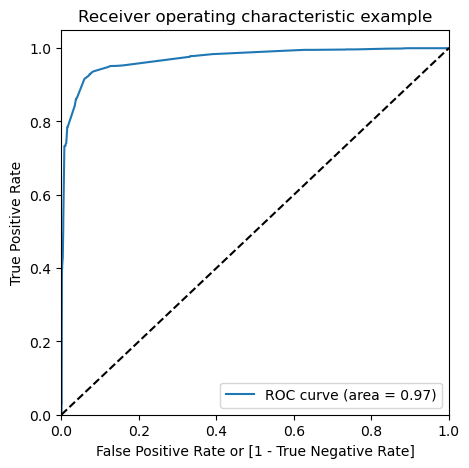

In [713]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


##### Finding Optimal Cutoff Point

In [714]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.108331,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.313336,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.008078,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.507390,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.999499,7987,1,1,1,1,1,1,1,1,1,1,1


In [715]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.788695  0.975879  0.671447
0.2   0.2  0.924264  0.936631  0.916517
0.3   0.3  0.926626  0.930090  0.924456
0.4   0.4  0.927098  0.926410  0.927529
0.5   0.5  0.931034  0.915781  0.940589
0.6   0.6  0.923004  0.860998  0.961844
0.7   0.7  0.923319  0.860589  0.962612
0.8   0.8  0.892615  0.741210  0.987452
0.9   0.9  0.892300  0.737122  0.989501


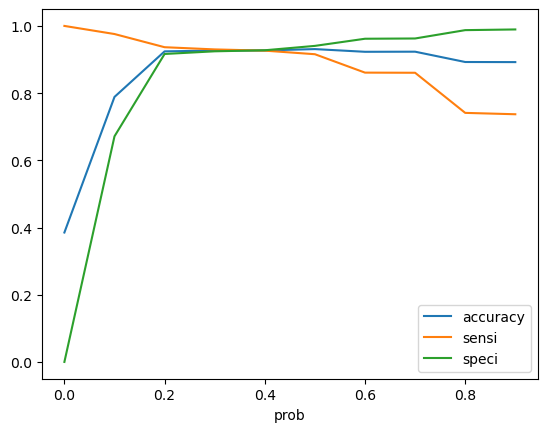

In [716]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observations:

##### From the above curve, we get 0.3 is the optimum point to take it as a cutoff probability.



In [717]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.108331,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.313336,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.008078,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.507390,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.999499,7987,1,1,1,1,1,1,1,1,1,1,1,1


## 4.6  Assigning Lead Score

In [718]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.108331,3009,0,1,1,0,0,0,0,0,0,0,0,0,11
1,0,0.313336,1012,0,1,1,1,1,0,0,0,0,0,0,1,31
2,0,0.008078,9226,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.507390,4750,1,1,1,1,1,1,1,0,0,0,0,1,51
4,1,0.999499,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [719]:
# let's build final confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3610,  295],
       [ 170, 2276]], dtype=int64)

In [720]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [721]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9267831837505904

In [722]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9304987735077678

In [723]:
# Let us calculate specificity

TN / float(TN+FP)

0.9244558258642765

In [724]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.07554417413572344


In [725]:
# Negative predictive value

print (TN / float(TN+ FN))

0.955026455026455


## 4.7 Precision & Recall

In [726]:
# Precision

# TP / float(TP + FP)
from sklearn.metrics import precision_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)


0.9061488673139159

In [727]:
# Recall

# TP / float(TP + FN)
from sklearn.metrics import recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.9157808667211774

## 4.8 Precision and Recall Tradeoff

In [728]:
from sklearn.metrics import precision_recall_curve

In [729]:
pr, re, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

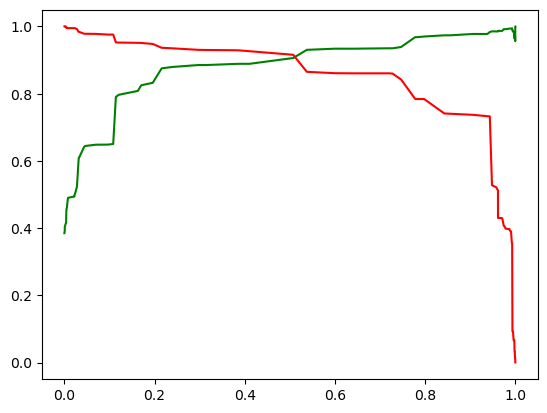

In [730]:
plt.plot(thresholds, pr[:-1], "g-")
plt.plot(thresholds, re[:-1], "r-")
plt.show()

## 4.9 Predictions on Test Set

In [731]:
# Scaling the X_test continuous variables using standard scaler
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.304501,-0.591008,0.998931,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0.666261,1.894051,1.564920,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,1.751544,-0.578179,2.130909,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [732]:
# keeping the columns chosen by final model and RFE
X_test = X_test[col2]
X_test.head()

,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,0,0,0,0,0,1,0,0,0,0,0,0,1
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [733]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

# Making predictions on y_test
y_test_pred = res.predict(X_test_sm)

# viewing first 10 results
y_test_pred[:10]

3271    0.108331
1490    0.943417
7936    0.108331
4216    0.990440
3830    0.108331
1800    0.943417
6507    0.033270
4821    0.002682
4223    0.992975
4714    0.195962
dtype: float64

In [734]:
# Converting y_test_pred to a dataframe which is an array

y_pred_df = pd.DataFrame(y_test_pred)

y_pred_df.head()

,0
3271,0.108331
1490,0.943417
7936,0.108331
4216,0.990440
3830,0.108331


In [735]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [736]:
# Putting Customer ID  as index

y_test_df['Prospect ID'] = y_test_df.index

In [737]:
# Removing original index from both dataframes

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [738]:
# Appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# checking head
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.108331
1,1,1490,0.943417
2,0,7936,0.108331
3,1,4216,0.990440
4,0,3830,0.108331


In [739]:
# Renaming the column named 0

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [740]:
# Adding column based on cut-off value

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.108331,0
1,1,1490,0.943417,1
2,0,7936,0.108331,0
3,1,4216,0.990440,1
4,0,3830,0.108331,0


## 4.10 Model Evaluation (Target Variable)

In [741]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_final

array([[1595,  139],
       [  90,  899]], dtype=int64)

In [742]:
# checking overall Accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9159015791406537

In [743]:
# Creating TP, TN, FP, FN

TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [744]:
# Sensitivity

TP / float(TP+FN)

0.9089989888776542

In [745]:
# Specificity

TN / float(TN+FP)

0.919838523644752

# 5. Final Inferences:

From Train Dataset, we obtain:
   
   Accuracy : 93.10%

   Sensitivity : 91.57%
   
   Specificity : 94.05%

From Test Dataset, we obtain:
   
   Accuracy : 91.59%

   Sensitivity : 90.89%
   
   Specificity : 91.98%